In [1]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV, RandomizedSearchCV
from sklearn.neural_network import MLPClassifier
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, classification_report
from sklearn.preprocessing import StandardScaler, LabelEncoder
import time
import matplotlib.pyplot as plt

In [2]:
# Load the data
df_hot = pd.read_csv("Kivela - Final Exam PreProcessed.csv")

In [3]:
# Convert categorical variables to numerical
le = LabelEncoder()
df_hot['Credit_Mix'] = le.fit_transform(df_hot['Credit_Mix'])

# Split the data into features (X) and target variable (y)
X = df_hot.drop(columns=['Credit_Mix'])  # Features
y = df_hot['Credit_Mix']  # Target variable

In [4]:
# Split data into training and testing sets
train_X, valid_X, train_y, valid_y = train_test_split(X, 
                                                      y, 
                                                      test_size=0.2, 
                                                      random_state=42)

In [5]:
# Standardize features by scaling
scaler = StandardScaler()
train_X_scaled = scaler.fit_transform(train_X)
valid_X_scaled = scaler.transform(valid_X)

In [6]:
# Initialize/instantiate MLPClassifier
clf_mlp = MLPClassifier(hidden_layer_sizes=(100,), 
                        activation='relu', 
                        solver='adam', 
                        max_iter=1000,
                       )

In [7]:
# Train the model
clf_mlp.fit(X = train_X_scaled, 
            y = train_y)

MLPClassifier(max_iter=1000)

In [8]:
# Set some names
FeatureNames = list(valid_X.columns)
ClassNames = list(clf_mlp.classes_)

In [9]:
# Number of layers and nodes
num_layers = clf_mlp.n_layers_
num_nodes = clf_mlp.hidden_layer_sizes

print("Number of Layers:", num_layers)
print("Number of Nodes in Each Hidden Layer:", num_nodes)

Number of Layers: 3
Number of Nodes in Each Hidden Layer: (100,)


In [10]:
# Cross-validation on the training set
cv_scores = cross_val_score(clf_mlp, X, y, cv=5)

print("Cross-validation scores on training set:", cv_scores)
print("Mean CV accuracy on training set:", cv_scores.mean())
# CV accuracy = estimate of how well the model generalizes to new data.

Cross-validation scores on training set: [0.53389725 0.63963179 0.63826347 0.58552059 0.53825103]
Mean CV accuracy on training set: 0.5871128249782311


In [11]:
# Feature importances are not directly assessed in MLP like they are in other classifiers

In [12]:
# Define hyperparamters:
param_grid = {
    'hidden_layer_sizes': [(50,), (100,), (150,)],  # Number of neurons
    'activation': ['relu', 'tanh', 'logistic'], 
    'solver': ['adam', 'sgd'],  # Optimization
    'learning_rate': ['constant', 'adaptive'], 
}

In [13]:
# Went with randomized because of compute needs
rand = RandomizedSearchCV(clf_mlp,
                         param_grid,
                         n_iter = 10,
                         cv = 3,
                         scoring = 'accuracy',
                         random_state = 373)

# Fit the randomized cv
rand.fit(X, y)

# Print best parameters and best score
print('Initial score: ', rand.best_score_)
print('Initial parameters: ', rand.best_params_)

Initial score:  0.5671600785299441
Initial parameters:  {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'activation': 'logistic'}


In [14]:
# Update parameters (wash, rinse, repeat)
# Define hyperparamters:
param_grid = {
    'hidden_layer_sizes': [(10, ), (50, ), (100)],  # Number of neurons in the layer
    'activation': ['relu'], 
    'solver': ['adam'],  # Optimization
    'learning_rate': ['constant'], 
}

In [15]:
# Updated Randomized Search (wash, rinse, repeat)
rand = RandomizedSearchCV(clf_mlp,
                         param_grid,
                         n_iter = 3,
                         cv = 5,
                         scoring = 'accuracy',
                         random_state = 373)

# Fit the randomized cv
rand.fit(X, y)

# Print best parameters and best score
print('Best score: ', rand.best_score_)
print('Best parameters: ', rand.best_params_)


Best score:  0.6193307625326534
Best parameters:  {'solver': 'adam', 'learning_rate': 'constant', 'hidden_layer_sizes': (50,), 'activation': 'relu'}


In [16]:
# Evaluate the final model on validatoipn data
best_clf = rand.best_estimator_

# Predict on validation data
y_pred = best_clf.predict(valid_X)

# Validation Score
valid_accuracy = best_clf.score(valid_X, valid_y)

print("Accuracy on validation set:", valid_accuracy)

Accuracy on validation set: 0.5780569722602313


Accuracy: 0.5780569722602313
Precision: 0.6760638326825712
Recall: 0.5780569722602313
F1-score: 0.5040410482467288
Confusion Matrix:
 [[ 927    1 1009]
 [   1  193 2240]
 [  60   81 3527]]
[[ 927    1 1009]
 [   1  193 2240]
 [  60   81 3527]]


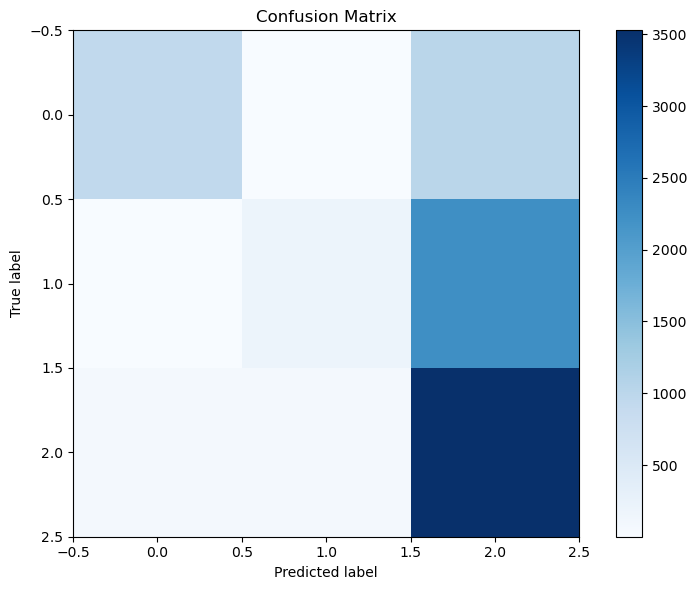

In [17]:
# Calculate evaluation metrics (Classification Report)
accuracy = accuracy_score(valid_y, y_pred)
precision = precision_score(valid_y, y_pred, average='weighted')
recall = recall_score(valid_y, y_pred, average='weighted')
f1 = f1_score(valid_y, y_pred, average='weighted')
conf_matrix = confusion_matrix(valid_y, y_pred)

print("Accuracy:", accuracy)
print("Precision:", precision)
print("Recall:", recall)
print("F1-score:", f1)
print("Confusion Matrix:\n", conf_matrix)

conf_mat = confusion_matrix(valid_y, y_pred)
print(conf_mat)

# Plot confusion matrix
plt.figure(figsize=(8, 6))
plt.imshow(conf_mat, interpolation='nearest', cmap=plt.cm.Blues)
plt.title('Confusion Matrix')
plt.colorbar()
plt.xlabel('Predicted label')
plt.ylabel('True label')
plt.tight_layout()

# Store confusion matrix in variable conf_mat
conf_mat = plt

plt.show()